In [514]:
# Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os

In [515]:
# Reading data
dev_df = pd.read_csv(f'.{os.sep}data{os.sep}dev_index.csv')

In [516]:
dev_df.head() # Literacy is a percentage

,Population,Area,Density,GDP,Literacy,Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


### Relation between features
In order to classify this data into its possible categories (given by the column named Development Index), let's first try to reason upon how can one feature be relate to another and ultimately how this relaton can weight in the determination of the category.

Let's formulate our first **hypothesis** as follows: It is reasonable to think that the Gross Domestic Product (GDP) has a relation with infant mortality, because GDP is a sinalization of the production of goods whitin a region and its economic activities. Therefore, if we observe a low GDP its very likely that we will also observe a high rate of infant mortality, the opposite holds true as well. 

In [517]:
# Let's first consider two features
x1 = dev_df['Infant mortality'].to_numpy()
x2 = dev_df['GDP'].to_numpy()

X = np.column_stack((x1, x2))
X[:2] # Two first rows of features

array([[9.382e+01, 1.200e+03],
       [4.560e+00, 3.110e+04]])

In [518]:
# Labels
y = np.array(dev_df['Development Index'])
y[:10] # Ten first values of labels

array([2, 4, 2, 4, 3, 3, 4, 4, 4, 2])

In [519]:
# Fit model
model = LogisticRegression(multi_class='multinomial', max_iter=2000).fit(X, y)

# Predictions
predictions = model.predict(X)

Text(194.24318181818177, 0.5, 'GDP')

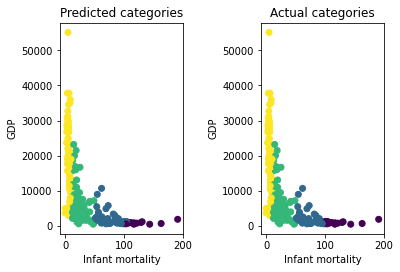

In [520]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X[:,0], X[:,1], c=predictions) # Predicted
ax2.scatter(X[:,0], X[:,1], c=y) # Actual 
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Infant mortality')
ax1.set_ylabel('GDP')
ax2.set_title('Actual categories')
ax2.set_xlabel('Infant mortality')
ax2.set_ylabel('GDP')

In [521]:
# GDP mean of each category based on actual category

dev_df.groupby('Development Index')['GDP'].mean()

Development Index
1      961.538462
2     2180.769231
3     6626.966292
4    20752.112676
Name: GDP, dtype: float64

We can observe that regions with 100 to roughly 200 infant mortality, express a GDP mean of 961,53 (purple category). Regions with infant mortality in range of roughly 50 to 100, express a GDP mean of 2.180,76 (blue category). Furthermore, regions with roughly 10 to 50 infant mortality posses a GDP mean of 6.626,96 (green category). And regions with less than roughly 10 infant mortality shows the highest value of GDP mean: 20.752,11 (yellow category). These facts are very strong arguments for our **hyphotesis**.

Moreover, in relation to the predictions of the categories themselves, we observe that our predictions are highly accurate. This possibly indicates that those two features together has a great influence in the determination of the category of a particular region, but this affirmation demands further analysis.

In [522]:
# Now let's change the two features to see if it's possible to draw new conclusions
x1 = dev_df['Literacy'].to_numpy()
x2 = dev_df['GDP'].to_numpy()

X2 = np.column_stack((x1, x2))
X2[:2] # Two first rows of features

array([[   47.5,  1200. ],
       [  100. , 31100. ]])

In [523]:
# Predictions
# Not a good model 
predictions = model.predict(X2)

Text(194.24318181818177, 0.5, 'GDP')

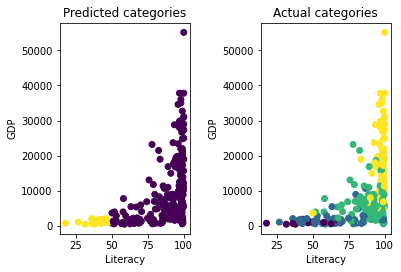

In [524]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X2[:,0], X2[:,1], c=predictions) # Predicted
ax2.scatter(X2[:,0], X2[:,1], c=y) # Actual
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Literacy')
ax1.set_ylabel('GDP')
ax2.set_title('Actual categories')
ax2.set_xlabel('Literacy')
ax2.set_ylabel('GDP')

In [525]:
# Fit model
model = LogisticRegression(multi_class='multinomial', max_iter=2000).fit(X2, y)

# Predictions
# Doesn't model data very well
predictions = model.predict(X2)

Text(194.24318181818177, 0.5, 'GDP')

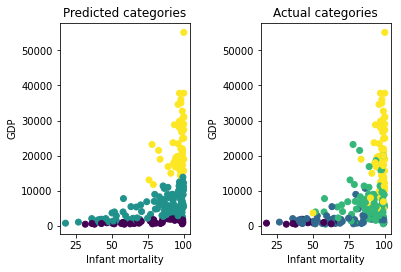

In [526]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X2[:,0], X2[:,1], c=predictions) # Predicted
ax2.scatter(X2[:,0], X2[:,1], c=y) # Actual
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Infant mortality')
ax1.set_ylabel('GDP')
ax2.set_title('Actual categories')
ax2.set_xlabel('Infant mortality')
ax2.set_ylabel('GDP')

In [585]:
# Now let's add a new feature
# and see if it has any relation with the other two which we know relates to each other
x1 = dev_df['Infant mortality'].to_numpy()
x2 = dev_df['GDP'].to_numpy()
x3 = dev_df['Literacy'].to_numpy()

X = np.column_stack((x1, x2, x3))
X[:2] # Two first rows of features

array([[9.382e+01, 1.200e+03, 4.750e+01],
       [4.560e+00, 3.110e+04, 1.000e+02]])

In [586]:
model = LogisticRegression(multi_class='multinomial', max_iter=1600).fit(X, y)
predictions = model.predict(X)

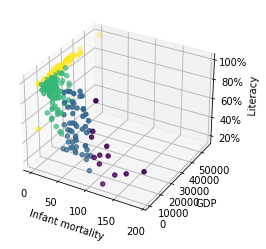

In [588]:
# Predicted values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=predictions)
ax.set_xlabel('Infant mortality')
ax.set_ylabel('GDP')
ax.set_zlabel('Literacy')
ax.zaxis.set_major_formatter(mtick.PercentFormatter()) # z axis as percentage

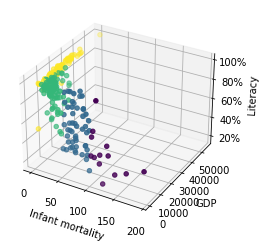

In [589]:
# Actual values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.set_xlabel('Infant mortality')
ax.set_ylabel('GDP')
ax.set_zlabel('Literacy')
ax.zaxis.set_major_formatter(mtick.PercentFormatter()) # z axis as percentage